 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [63]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [64]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [65]:
# Count nulls
whale.isnull().mean() * 100
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [66]:
# Drop nulls
whale.dropna(inplace=True)
# Validate dropped nulls 
whale.isnull().mean() * 100
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [67]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [68]:
# Count nulls
algo.isnull().mean() * 100
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [69]:
# Drop nulls
algo.dropna(inplace=True)
# Validate dropped nulls 
algo.isnull().mean() * 100
algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [70]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_cp = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [71]:
# Check Data Types
sp500_cp.dtypes

Close    object
dtype: object

In [72]:
# Fix Data Types
# Changing the "Close" columns to a float type and removed the $ symbol
sp500_cp["Close"] = sp500_cp["Close"].str.replace("$", "")
sp500_cp["Close"] = sp500_cp["Close"].astype("float")
# Sort SP500 in ascending order
sp500_cp = sp500_cp.sort_index()
sp500_cp.dtypes

Close    float64
dtype: object

In [73]:
# Calculate Daily Returns
sp500 = sp500_cp.pct_change()
sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [74]:
# Drop nulls
sp500 = sp500.dropna()
# Rename Column
# Renamed the columns from "Close" to "S&P500"
sp500 = sp500.rename(columns={
    "Close": "S&P500"
})
sp500.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [75]:
# Concatenate all DataFrames into a single DataFrame
joined_data_cols = pd.concat([whale, algo, sp500], axis="columns", join="inner")
joined_data_cols.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

### Does any portfolio outperform the S&P 500?

### Berkshire and Algo1 outperform the S&P 500.

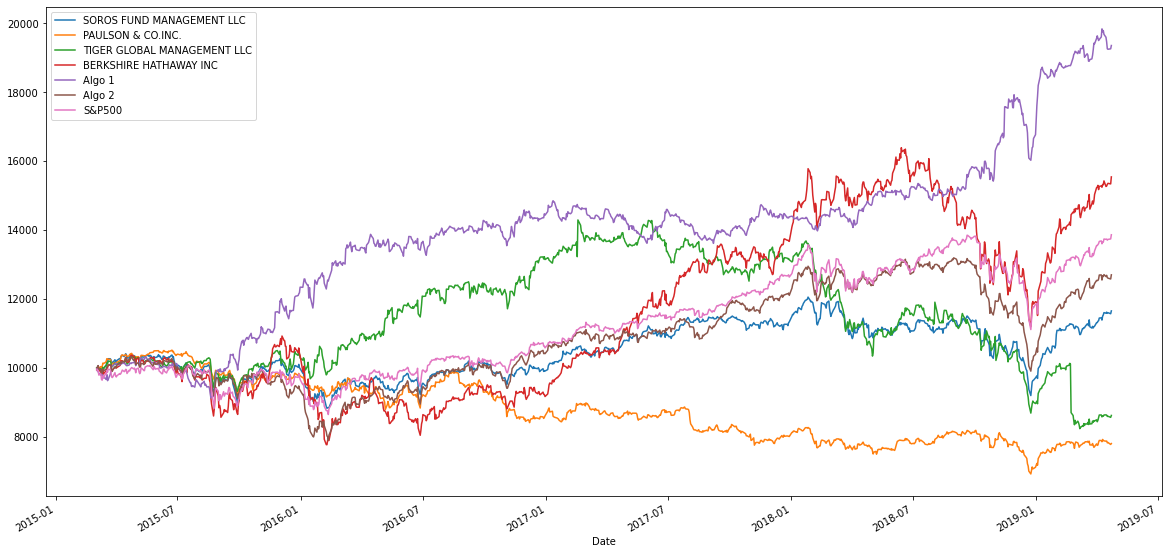

In [109]:
# Calculate daily cumulative returns 
cumulative_returns = (1 + joined_data_cols).cumprod()
# Plot cumulative returns
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot(figsize=(20,10))

In [110]:
# Viewed cumulative returns
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

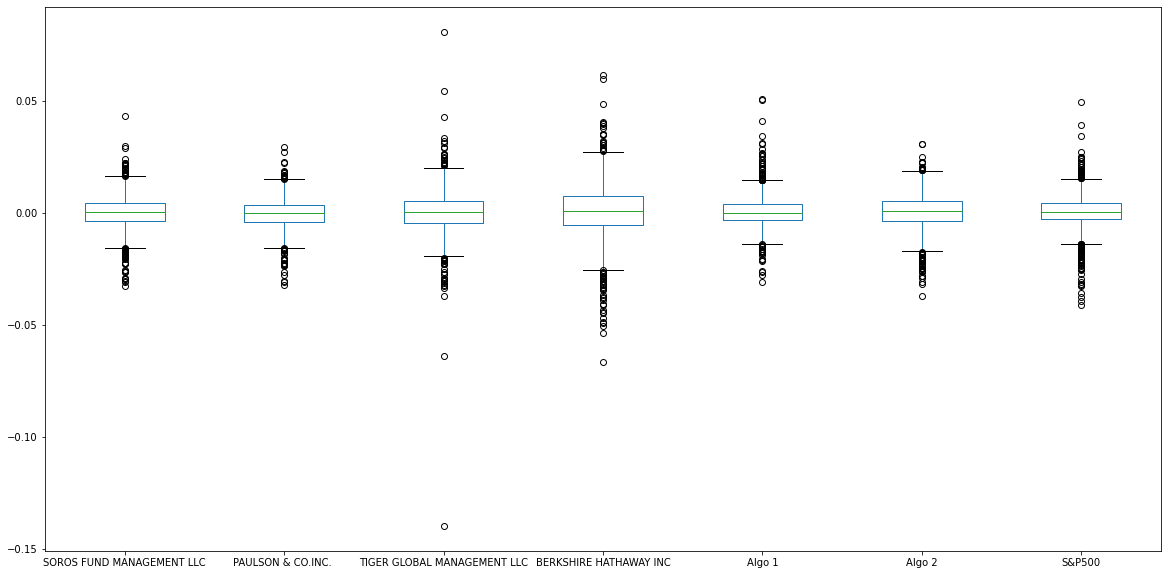

In [78]:
# Box plot to visually show risk
joined_data_cols.plot.box(figsize=(20,10))

In [80]:
# Used the describe function to find min and max
joined_data_cols.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.000177,-0.000214,-0.000083,0.000506,0.000662,0.000263,0.000349
std,0.007895,0.007023,0.010894,0.012919,0.007620,0.008342,0.008554
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.040979
25%,-0.003638,-0.004042,-0.004790,-0.005634,-0.003252,-0.003794,-0.002881
50%,0.000518,0.000000,0.000320,0.000735,0.000069,0.000703,0.000419
75%,0.004328,0.003626,0.005285,0.007619,0.003908,0.005253,0.004471
max,0.042977,0.029338,0.080705,0.061341,0.050735,0.030822,0.049594


### Which box has the largest spread and the smallest spread?

### The largest spread is Tiger and the smallest spread is Paulson, including outliers.

In [81]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
daily_std = joined_data_cols.std()
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Which portfolios are riskier than the S&P 500?

### Tiger and Berkshire are risker than the S&P 500.

In [82]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

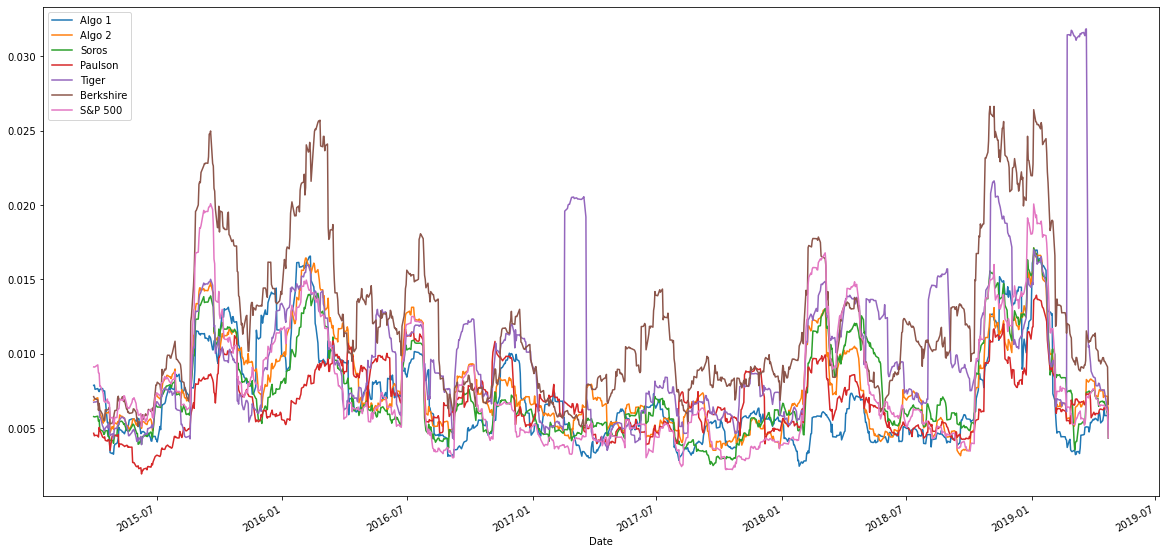

In [83]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_std = pd.concat([algo, whale, sp500], axis='columns', join='inner')
ax_std = combined_std.rolling(window=21).std().plot(figsize=(20,10))
# set the legend of the figure
ax_std.legend(["Algo 1", "Algo 2", "Soros","Paulson","Tiger","Berkshire", "S&P 500"]);

### Does the risk increase for each of portfolios at the same time risk increases for the S&P?

### No it does not.

In [84]:
# Construct a correlation table
correlation = combined_std.corr()
correlation

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500
Algo 1,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033,0.279494
Algo 2,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082,0.858764
SOROS FUND MANAGEMENT LLC,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360,0.837864
PAULSON & CO.INC.,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423,0.623946
BERKSHIRE HATHAWAY INC,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000,0.751371
S&P500,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371,1.000000


### Which returns most closely mimic the S&P?

### Algo 2 most closely mimics the S&P 500.

0.27053977318595673


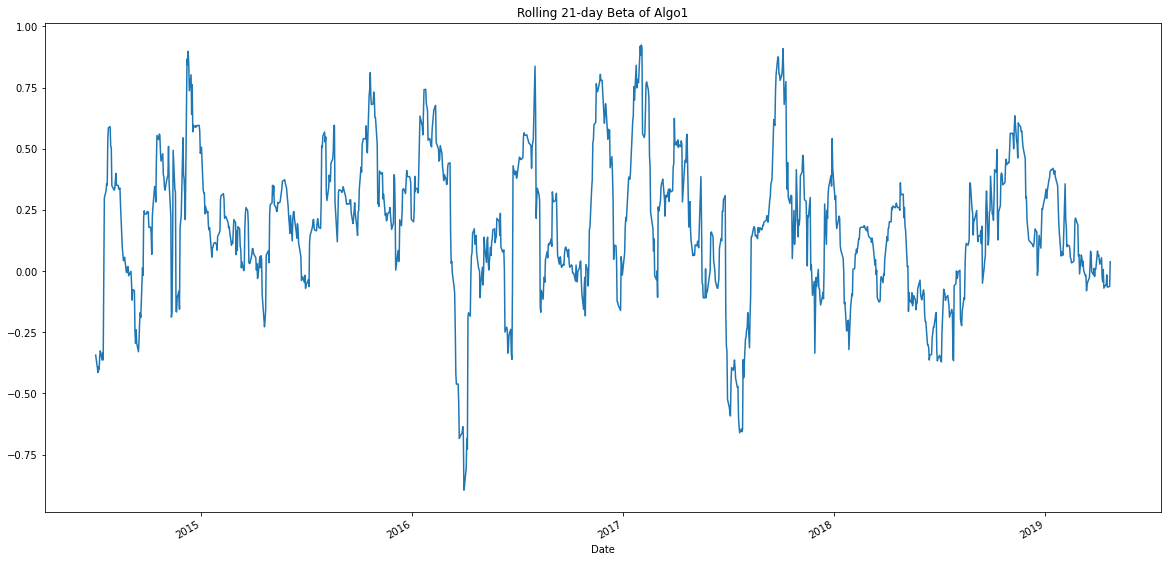

In [85]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = algo["Algo 1"].cov(sp500["S&P500"])
variance = sp500["S&P500"].var()
algo1_beta = covariance / variance
# Graph a Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)# calculate 21 day rolling covariance
algo1_cov_roll = algo["Algo 1"].rolling(window=21).cov(sp500["S&P500"])
# Calculate 21 day rolling variance
algo1_var_roll = sp500['S&P500'].rolling(window=21).var()
# Calculate 21 day rolling beta of Algo 1 vs S&P
algo1_beta_roll = algo1_cov_roll / algo1_var_roll
algo1_beta_roll.plot(figsize=(20,10), title="Rolling 21-day Beta of Algo1")
print(algo1_beta)

### Does the portfolio seem sensitive to movements in the S&P 500?

### No, there is a lag.

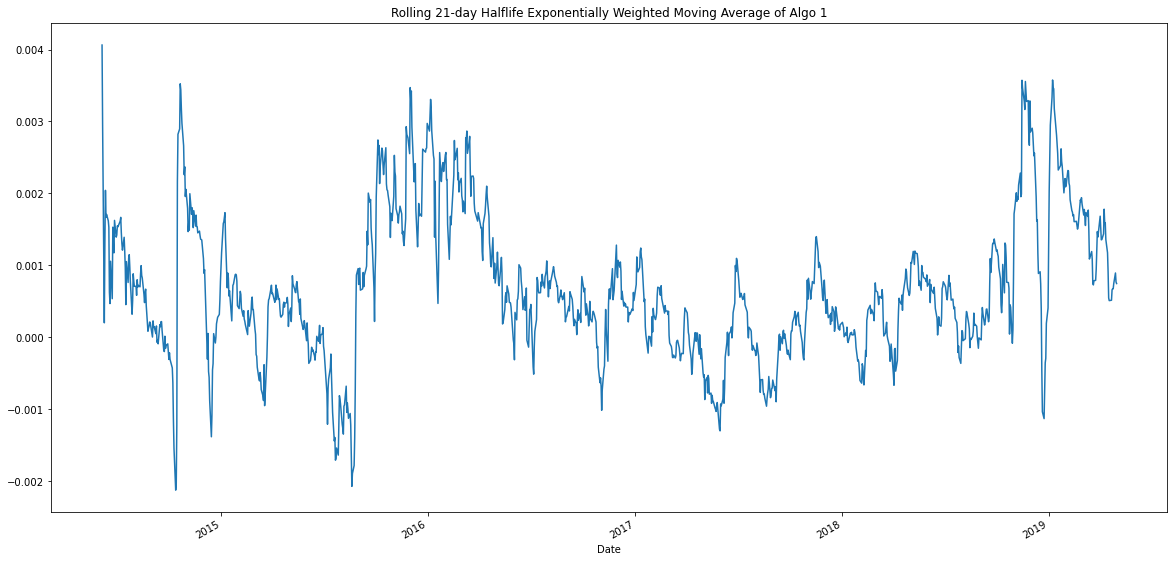

In [86]:
# Calculate a rolling window using the exponentially weighted moving average. 
ewm = algo["Algo 1"].ewm(halflife=21).mean()
ewm.plot(figsize=(20,10), title="Rolling 21-day Halflife Exponentially Weighted Moving Average of Algo 1")

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [87]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (joined_data_cols.mean() * 252) / (daily_std * np.sqrt(252))
sharpe_ratios

Algo 1                         1.378648
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
PAULSON & CO.INC.             -0.483570
S&P500                         0.648267
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
dtype: float64

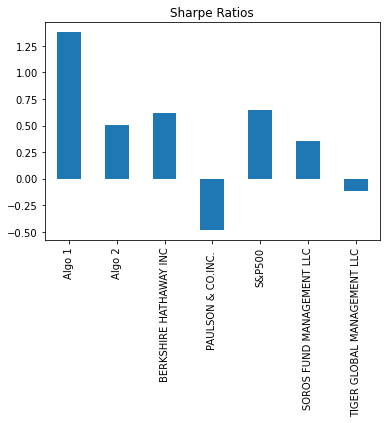

In [88]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Do our algo strategies outperform both 'the market' and the whales? 

### Algo 1 outperforms all the whales and "the market".  Algo 2 does not outperform

### the S&P and berkshire but does outperform the remaining whales (soros, paulson and tiger).

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [89]:
# Read the first stock
jbhunt_data= Path("Resources/close_jbhunt.csv")
jbhunt = pd.read_csv(jbhunt_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
jbhunt.head()

,Close
Date,
2018-01-07,110.65
2018-01-08,111.65
2018-01-09,112.65
2018-01-10,113.65
2018-01-11,114.65


In [90]:
# Read the second stock
wst_data = Path("Resources/close_west.csv")
wst = pd.read_csv(wst_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
wst.head()

,Close
Date,
2018-01-07,88.83
2018-01-08,89.83
2018-01-09,90.83
2018-01-10,91.83
2018-01-11,92.83


In [91]:
# Read the third stock
nke_data = Path("Resources/close_nike.csv")
nke = pd.read_csv(nke_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
nke.head()

,Close
Date,
2018-01-07,53.81
2018-01-08,54.81
2018-01-09,55.81
2018-01-10,56.81
2018-01-11,57.81


In [92]:
# Concatenate all stocks into a single DataFrame
custom_df = pd.concat([jbhunt, wst, nke], axis="columns", join="inner")
# Sort datetime index in ascending order (past to present)
custom_df.sort_index(inplace=True)
custom_df.head()

,Close,Close,Close
Date,,,
2018-01-07,110.65,88.83,53.81
2018-01-08,111.65,89.83,54.81
2018-01-09,112.65,90.83,55.81
2018-01-10,113.65,91.83,56.81
2018-01-11,114.65,92.83,57.81


In [93]:
# Pivot so that each column of prices represents a unique symbol
# Set column names to represent ticker of JB Hunt, West Pharmaceutical, and Nike 
custom_df.columns = ["JBHT", "WST","NKE"]
custom_df.head()

,JBHT,WST,NKE
Date,,,
2018-01-07,110.65,88.83,53.81
2018-01-08,111.65,89.83,54.81
2018-01-09,112.65,90.83,55.81
2018-01-10,113.65,91.83,56.81
2018-01-11,114.65,92.83,57.81


In [94]:
# Calculate the percent change to find the daily returns of the closing prices
custom_return = custom_df.pct_change()
# Drop Nulls
custom_return = custom_return.dropna()
custom_return.head()

,JBHT,WST,NKE
Date,,,
2018-01-08,0.009038,0.011257,0.018584
2018-01-09,0.008957,0.011132,0.018245
2018-01-10,0.008877,0.011010,0.017918
2018-01-11,0.008799,0.010890,0.017603
2018-01-12,0.008722,0.010772,0.017298


In [95]:
# Check Nulls
custom_return.isnull().mean() * 100
custom_return.isnull().sum()

JBHT    0
WST     0
NKE     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [96]:
# Calculate weighted portfolio returns
weights = [.33, .33, .33]
portfolio_returns = custom_return.dot(weights)
portfolio_returns.head()

Date
2018-01-08    0.012830
2018-01-09    0.012650
2018-01-10    0.012476
2018-01-11    0.012306
2018-01-12    0.012142
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [97]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
joined_custom = pd.concat([joined_data_cols, portfolio_returns], axis='columns', join='inner')
# Set column names, since the custom portfolio is labelled 'zero'
joined_custom.columns=['Soros',"Paulson", "Tiger","Berkshire","Algo 1","Algo 2","S&P_500","Custom"]

In [98]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# Drop Nulls
joined_custom = joined_custom.dropna()
# Check Nulls
joined_custom.isnull().mean() * 100
joined_custom.isnull().sum()

Soros        0
Paulson      0
Tiger        0
Berkshire    0
Algo 1       0
Algo 2       0
S&P_500      0
Custom       0
dtype: int64

In [100]:
# View data
joined_custom.head()

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P_500,Custom
Date,,,,,,,,
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662,0.012830
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303,0.012650
2018-01-10,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.001112,0.012476
2018-01-11,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.007034,0.012306
2018-01-12,0.002590,0.002418,0.003807,0.002594,-0.000875,0.002411,0.006750,0.012142


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [101]:
# Risk
# Calculate the standard deviation for each portfolio. 
custom_std = joined_custom.std()
# Which portfolios are riskier than the S&P 500? 
# Sort the Daily SD results
# The higher the SD, the higher the risk
custom_std = custom_std.sort_values(ascending=False)
custom_std.head(10)

Berkshire    0.015206
Custom       0.012853
Tiger        0.012581
S&P_500      0.010800
Soros        0.009997
Algo 2       0.009033
Algo 1       0.007608
Paulson      0.007477
dtype: float64

In [102]:
# Calculate the annualized standard deviation (252 trading days)
annualized_custom_std = custom_std * np.sqrt(252)
annualized_custom_std.head(10)

Berkshire    0.241387
Custom       0.204038
Tiger        0.199715
S&P_500      0.171450
Soros        0.158696
Algo 2       0.143391
Algo 1       0.120770
Paulson      0.118695
dtype: float64

### Using the annualized standard deviation (252 trading days) for all portfolios including the custom portfolio, which is riskier than the S&P500?

### Tiger, Berkshire, and the custom portfolio are all risker than the S&P 500.

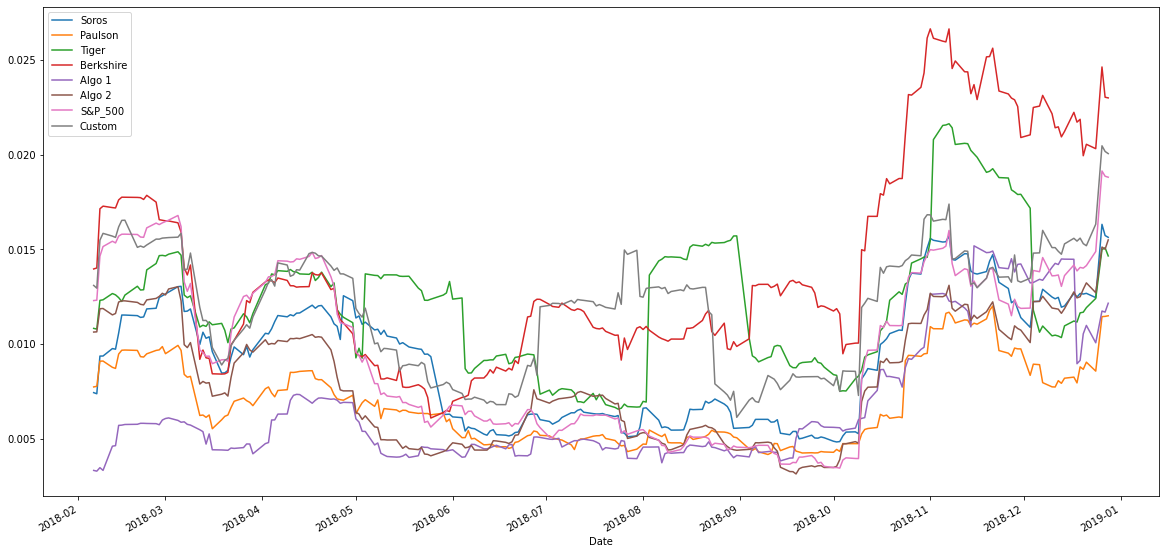

In [103]:
# Rolling
ax_custom = joined_custom.rolling(window=21).std().plot(figsize=(20,10))
# set the legend of the figure
ax_custom.legend(["Soros", "Paulson", "Tiger","Berkshire","Algo 1","Algo 2", "S&P_500","Custom"]);

In [104]:
# Annualized Sharpe Ratios
sharpe_ratios_all = (joined_custom.mean() * 252) / (joined_custom.std() * np.sqrt(252))
sharpe_ratios_all

Soros       -1.108095
Paulson     -1.180281
Tiger       -1.883245
Berkshire   -0.748095
Algo 1       1.341701
Algo 2      -1.314417
S&P_500     -0.502952
Custom       0.360751
dtype: float64

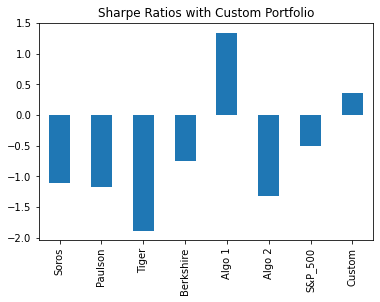

In [105]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar", title="Sharpe Ratios with Custom Portfolio")

In [106]:
# Create a correlation analysis
correlation = joined_custom.corr()
correlation

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P_500,Custom
Soros,1.000000,0.785734,0.618131,0.803937,0.382368,0.847106,0.858062,0.652129
Paulson,0.785734,1.000000,0.664717,0.680619,0.360405,0.818519,0.816850,0.595386
Tiger,0.618131,0.664717,1.000000,0.502846,0.189700,0.620178,0.704757,0.534599
Berkshire,0.803937,0.680619,0.502846,1.000000,0.379988,0.800008,0.838205,0.635664
Algo 1,0.382368,0.360405,0.189700,0.379988,1.000000,0.366314,0.326159,0.251885
Algo 2,0.847106,0.818519,0.620178,0.800008,0.366314,1.000000,0.895456,0.727971
S&P_500,0.858062,0.816850,0.704757,0.838205,0.326159,0.895456,1.000000,0.752851
Custom,0.652129,0.595386,0.534599,0.635664,0.251885,0.727971,0.752851,1.000000


### How does your custom portfolio fair compared to S&P 500?

### The Beta is greater than 1, which means that it has more risk than S&P 500.

1.5884722513891598


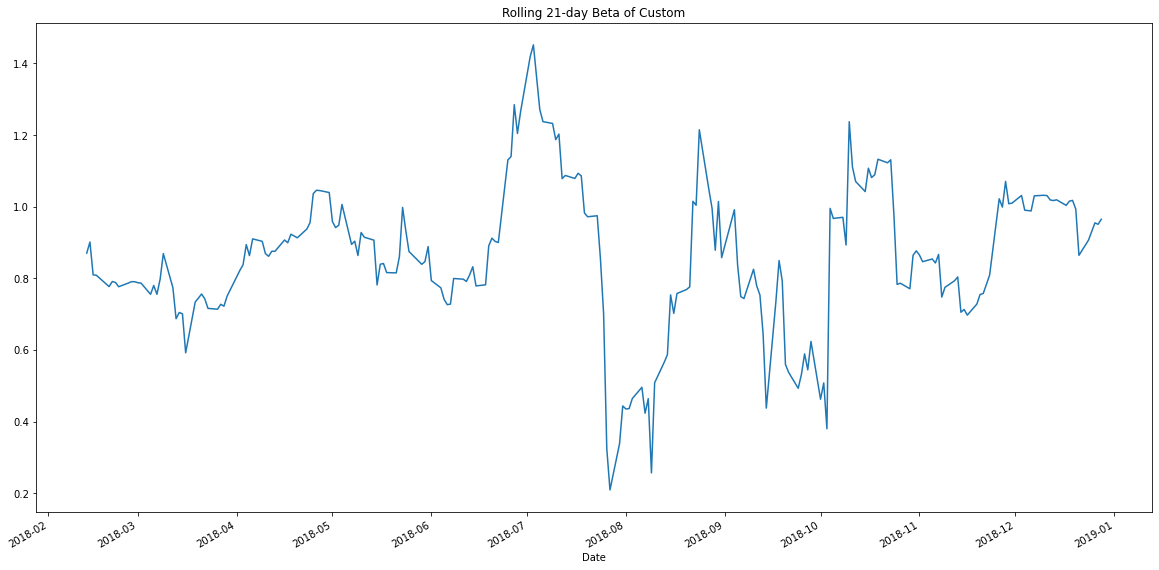

In [107]:
# Beta
covariance = portfolio_returns.cov(sp500["S&P500"])
variance = sp500["S&P500"].var()
custom_beta = covariance / variance
# Calculate 21 day rolling covariance
custom_cov_roll = portfolio_returns.rolling(window=21).cov(sp500["S&P500"])
# Calculate 21 day rolling variance
custom_var_roll = sp500['S&P500'].rolling(window=21).var()
# Calculate 21 day rolling beta of CUSTOM vs S&P
custom_beta_roll = custom_cov_roll / custom_var_roll
custom_beta_roll.plot(figsize=(20,10), title="Rolling 21-day Beta of Custom")
print(custom_beta)